<a href="https://colab.research.google.com/github/s1063724/GetCarPrice/blob/main/program/GetCarPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
  - 資料來源:abc好車網
    https://www.abccar.com.tw/Search?tab=1&SearchType=1&OrderByField=0
  - 樣本數:270
  - 欄位:車名(name)、年分(year)、里程(mileage)、區域(local)、價錢(price)
'''
import pandas as pd
import numpy as np

df = pd.read_csv('CarSale.csv', encoding='utf-8', index_col = ['name'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, M-BENZ CLA250 (C117) to TOYOTA Yaris E (2代)
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     270 non-null    object 
 1   mileage  270 non-null    float64
 2   local    270 non-null    object 
 3   price    270 non-null    float64
dtypes: float64(2), object(2)
memory usage: 10.5+ KB


In [ ]:
data = df.copy()

In [ ]:
target = data.pop('price')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['year'] = le.fit_transform(data['year'])
data['local'] = le.fit_transform(data['local'])
data



,year,mileage,local
name,,,
M-BENZ CLA250 (C117),7,7.1,8
M-BENZ C300 Coupe 4MATIC AMG Line (C205),8,8.0,8
M-AMG C63 S (W205),8,6.0,8
M-BENZ C250 Coupe 運動版 (C205),8,7.0,8
TOYOTA Corolla Altis 經典版 (12代),12,3.9,8
...,...,...,...
LEXUS UX250h 豪華版,13,0.8,2
LEXUS NX200 菁英版 (1代),11,6.4,2
LEXUS NX200 菁英版 (1代),11,1.5,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, M-BENZ CLA250 (C117) to TOYOTA Yaris E (2代)
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     270 non-null    int64  
 1   mileage  270 non-null    float64
 2   local    270 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 8.4+ KB


In [ ]:
target

name
M-BENZ CLA250 (C117)                         98.8
M-BENZ C300 Coupe 4MATIC AMG Line (C205)    135.8
M-AMG C63 S (W205)                          226.8
M-BENZ C250 Coupe 運動版 (C205)                138.8
TOYOTA Corolla Altis 經典版 (12代)               45.8
                                            ...  
LEXUS UX250h 豪華版                            129.8
LEXUS NX200 菁英版 (1代)                        127.8
LEXUS NX200 菁英版 (1代)                        132.8
TOYOTA Yaris E (2代)                          33.8
TOYOTA Yaris E (2代)                          19.8
Name: price, Length: 270, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_valid, target_train, target_valid = train_test_split(data, target, test_size=0.2)
print(data_train.shape)
print(data_valid.shape)

print(target_train.shape)
print(target_valid.shape)

(216, 3)
(54, 3)
(216,)
(54,)


In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(data_train, target_train)

pre = regr.predict(data_valid)
# 預測結果(汽車價格)
print(pre.round())
# 實際結果(汽車價格)
print(target_valid)

[109.  58.  96. 136. 104.  86. 129.  56.  85.  63. 150.  83. 118.  63.
  79. 150.  41. 127. 122.  89. 107.  96.  81.  76.  78. 133.  70. 103.
 107. 134. 139.  83. 109.  50.   0.  66. 156.  82. 138. 102.  80. 105.
 129.  78. 141.  77.  99.  54. 100.  51. 107. 114. 126. 130.]
name
LEXUS NX200 菁英版 (1代)                   115.8
TOYOTA Vios J (1代)                      29.8
TOYOTA RAV4 2.0 E (4代)                  85.8
Honda Fit e:HEV (4代)                    66.8
TOYOTA RAV4 2.0 旗艦 (5代)                 55.8
LEXUS IS250 尊榮版 (2代)                    78.8
TOYOTA Corolla Altis 雅緻版 (11代)          73.8
LEXUS ES300h 旗艦版 (6代)                   72.8
M-AMG C63 S (W205)                     226.8
TOYOTA RAV4 2.5 G (4代)                  45.8
Volvo XC90 Plus B5 AWD                 209.8
M-BENZ C250 Coupe 運動版 (C205)           138.8
LUXGEN S5 GT225 AP賽道智能款                 48.8
TOYOTA RAV4 2.5 G (4代)                  45.8
Hyundai Elantra 1.6 悍動型 (6代)            26.8
TOYOTA Corolla Cross                    71.7


In [ ]:
# 訓練分數
print(regr.score(data_train, target_train).round(3))
# 驗證分數
print(regr.score(data_valid, target_valid).round(3))

# 係數<0.7，所以此模型不准

0.148
-0.363


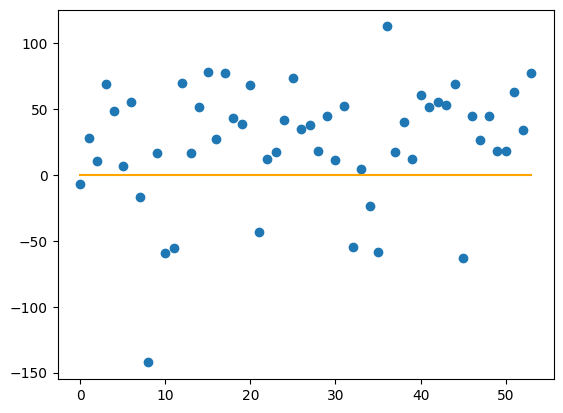

In [ ]:
import matplotlib.pyplot as plt
# 資料長度
x = np.arange(pre.size)
y = x*0
plt.scatter(x, pre - target_valid)
plt.plot(x, y, color='orange') # 劃出 y= 0 的基礎線
plt.show()

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
# 測試資料答案跟預測結果
print(mean_absolute_error(target_valid, pre).round(2))

44.08


In [ ]:
'''
  簡單線性回歸
    用里程預測價錢

'''

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = pd.DataFrame(df, columns=['mileage'])
y = pd.DataFrame(df, columns=['price'])

lm = LinearRegression()
lm.fit(X,y)
print('迴歸係數',lm.coef_)
print('截距',lm.intercept_)
# y = -3.5X + 116.2

迴歸係數 [[-3.50731781]]
截距 [116.20307036]


In [ ]:
# 預測
new_m = pd.DataFrame(np.array([9.5, 15 ,5]),columns = ['mileage'])
pred_p = lm.predict(new_m)
print('AI 的答案:\n',pred_p)

AI 的答案:
 [[82.88355119]
 [63.59330324]
 [98.66648132]]


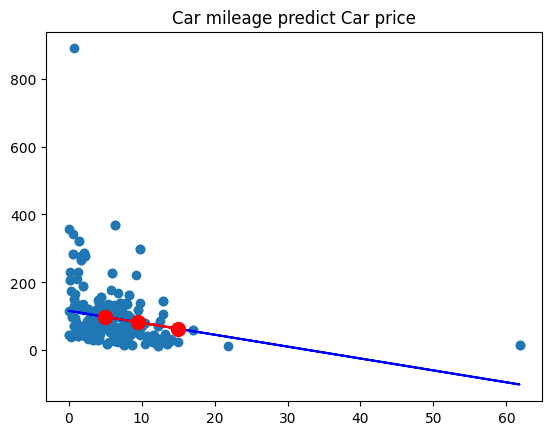

In [ ]:
plt.scatter(df['mileage'], df['price'])
re_price = lm.predict(X)
plt.plot(df['mileage'], re_price, color = 'b')
plt.plot(new_m, pred_p, color = 'r', marker = 'o', markersize = 10)
plt.title('Car mileage predict Car price')
plt.show()